# Plotting
- We already covered the basics of Matplotlib.
- Short reminder.




# Basic Example

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

fig = plt.figure(1)
ax1 = plt.subplot(211)
ax1.plot(t1, np.sin(2*np.pi*t1), 'bo', t2, np.sin(2*np.pi*t2), 'k')
ax1.legend(["Blue dotted", "Black line"])

ax2 = plt.subplot(212)
ax2.plot(t2, np.cos(2*np.pi*t2), 'r--')
ax2.legend(["Red dashed"])
fig.suptitle("Two curves")
plt.show()

# Dots per inch (DPI)

- How many dots/pixels per inch of printed paper/screen your graphic takes up. 
- common values
  - 96 dpi - standard screen
  - 300 dpi - smartphone screen / hdpi notebook etc. lower end for printing
  - 600 dpi - print requirement for line graphics to be published in Nature


In [2]:
fig = plt.figure(figsize=(4, 5), dpi=100)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.title("Two curves")
plt.legend(["Red dashed"])
plt.savefig("100dpi.png", dpi=100)
plt.close()
# we have to save and load the image because IPython does some 
# automatic resizing if plotted directly
from IPython.display import Image
Image(filename='100dpi.png') 

In [3]:
fig = plt.figure(figsize=(4, 5), dpi=300)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.title("Two curves")
plt.legend(["Red dashed"])
plt.savefig("300dpi.png", dpi=300)
plt.close()
Image(filename='300dpi.png') 

# Colormaps

-   Don't use the default jet colormap unless you have a reason
    -   [How bad is your colormap](https://jakevdp.github.io/blog/2014/10/16/how-bad-is-your-colormap/)
    -   [Matplotlibs guide to choosing colormaps](http://matplotlib.org/users/colormaps.html)
    -   [A better default colormap for Matplotlib (Video)](https://www.youtube.com/watch?v=xAoljeRJ3lU)
    -   [How the new Matplotlib colormap was chosen](http://bids.github.io/colormap/)
    -   [IBM research on human perception of colormaps](http://www.research.ibm.com/people/l/lloydt/color/color.HTM)
    -   [6 part blogpost about colormaps for the very interested](http://earthobservatory.nasa.gov/blogs/elegantfigures/2013/08/05/subtleties-of-color-part-1-of-6/)
    
-   [Palettable](https://jiffyclub.github.io/palettable/) for using colorbrewer colormaps

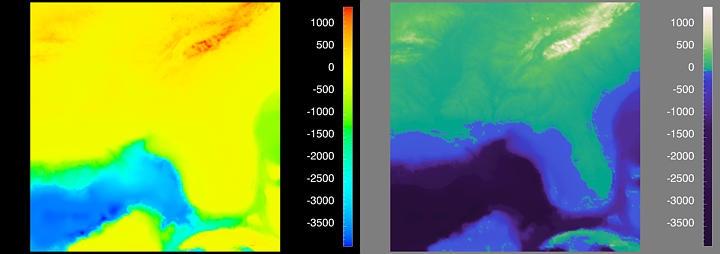

In [5]:
Image(filename='IBM-Figure1.jpg') 

# Making Maps

- Basic things we need
  - Data
  - Projection
  
## Python packages

[Matplotlib Basemap](http://matplotlib.org/basemap/) provides plotting on projections.
[Cartopy](http://scitools.org.uk/cartopy/docs/latest/index.html) does something similar. Not as mature yet.

#### Anaconda version issues

As of Jan 2016 Matplotlib Basemap is not available from Anaconda using Python 3.4 on Windows. Should be able to install from http://www.lfd.uci.edu/~gohlke/pythonlibs/#basemap using `pip install basemap-1.0.8-cp34-none-win_amd64.whl` after downloading the `.whl` file. Otherwise you can create a new conda environment using `conda create -n basemap27 python==2.7 basemap`.
  
## Lets look at projections first

### Definition
A systematic/mathematical transformation of longitudes and latitudes into locations on a plane (x, y coordinates)

### Lets start with the Equidistant Cylindrical Projection

The simplest projection since it displays the world in latitude/longitude

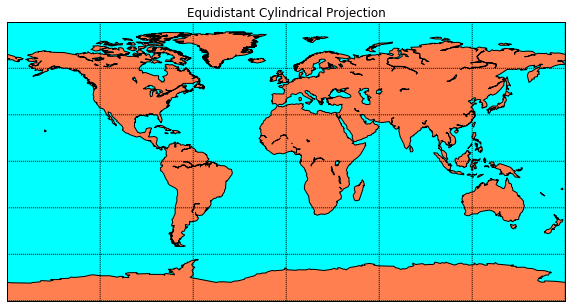

In [4]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 6))
# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# resolution = 'c' means use crude resolution coastlines.
m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='aqua')
plt.title("Equidistant Cylindrical Projection")
plt.show()

The Basemap object can be used to transform from lon, lat into x, y. 
With a Equidistant Cylindrical Projection this is pretty easy to follow.

In [7]:
m(50, 80)

(50, 80)

Let's try a geostationary projection. It shows the view of a geostationary satellite

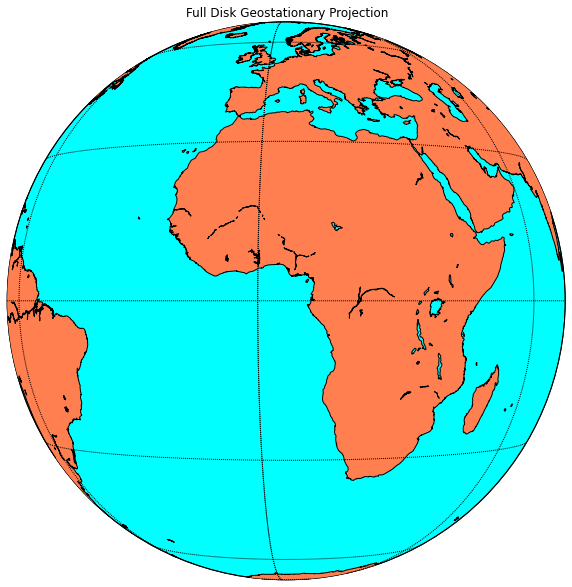

In [8]:
fig = plt.figure(figsize=(10, 10))
# lon_0 is the central longitude of the projection.
# resolution = 'l' means use low resolution coastlines.
# optional parameter 'satellite_height' may be used to
# specify height of orbit above earth (default 35,786 km).
m = Basemap(projection='geos',lon_0=5,resolution='l')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,420.,60.))
m.drawmapboundary(fill_color='aqua')
plt.title("Full Disk Geostationary Projection")
plt.show()

In [9]:
m(15, 45) # now the conversion from lon, lat to x,y is more involved

(6171033.264833007, 9681864.387781177)

# How to choose a projection

It is often difficult to come up with the correct projection parameters.

-   <http://projectionwizard.org/> can provide a good first guess
-   [List of projections](http://matplotlib.org/basemap/users/mapsetup.html) supported by Basemap


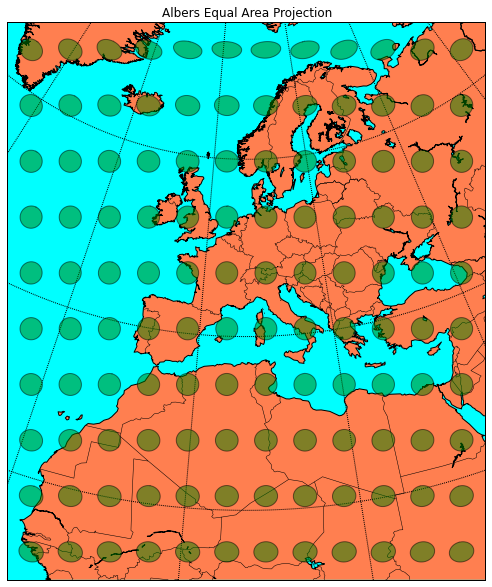

In [10]:
fig = plt.figure(figsize=(10, 10))
# setup albers equal area conic basemap
# lat_1 is first standard parallel.
# lat_2 is second standard parallel.
# lon_0,lat_0 is central point.
# Europe
m = Basemap(width=6000000,height=7000000,
            resolution='l',projection='aea',\
            lat_1=36.,lat_2=53,lon_0=7,lat_0=44)
# Austria
#m = Basemap(width=650000,height=600000,
#            resolution='h',projection='aea',\
#            lat_1=36.,lat_2=53,lon_0=13,lat_0=47)
#m.drawrivers(color='blue')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='aqua')
# draw tissot's indicatrix to show distortion.
ax = plt.gca()
for y in np.linspace(m.ymax/20,19*m.ymax/20,10):
    for x in np.linspace(m.xmax/20,19*m.xmax/20,12):
        lon, lat = m(x,y,inverse=True)
        poly = m.tissot(lon,lat,1.25,100,\
                        facecolor='green',zorder=10,alpha=0.5)
plt.title("Albers Equal Area Projection")
plt.show()

### Matplotlib Basemap comes with a few map backgrounds.

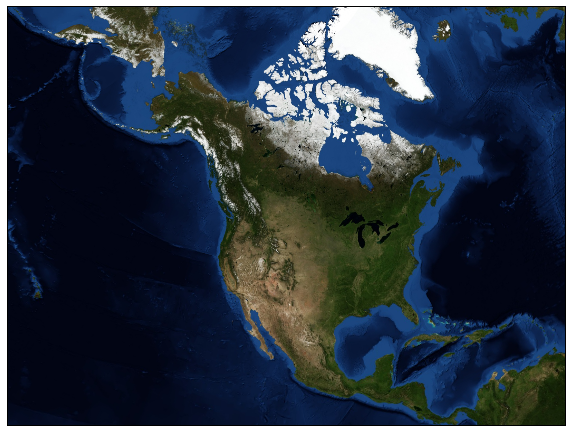

In [11]:
fig = plt.figure(figsize=(10, 10))
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution=None,lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
m.bluemarble()
plt.show()

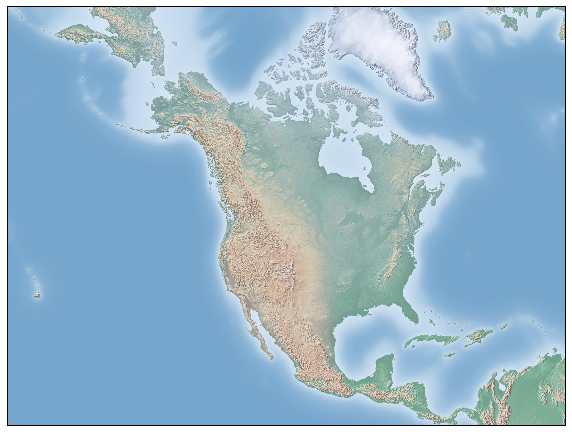

In [12]:
fig = plt.figure(figsize=(10, 10))
m.shadedrelief()
plt.show()

In [13]:
fig = plt.figure(figsize=(10, 10))
m.etopo()
plt.show()

## But we can use any image as a background

For example if we do not have data on Earth but on the Moon

- see also http://en.wikipedia.org/wiki/Selenographic_coordinates

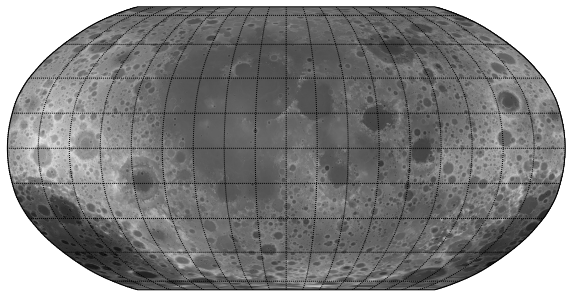

In [23]:
fig = plt.figure(figsize=(10, 6))
m = Basemap(projection='robin', lon_0=0)
m.warpimage("moonbumpmap2.jpg")
# draw parallels and meridians.
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
# image from http://www.johnstonsarchive.net/spaceart/moonbumpmap2.jpg
plt.show()

## Labeling of Parallels and Meridians is also supported

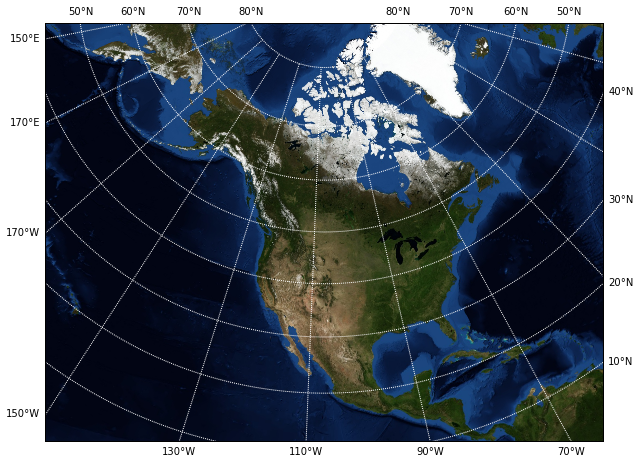

In [14]:
fig = plt.figure(figsize=(10, 10))
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution=None,lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
m.bluemarble()
# draw parallels and meridians.
# label parallels on right and top
# meridians on bottom and left
parallels = np.arange(0.,81,10.)
# labels = [left,right,top,bottom]
m.drawparallels(parallels, color='w',labels=[False,True,True,False])
meridians = np.arange(10.,351.,20.)
m.drawmeridians(meridians, color='w', labels=[True,False,False,True])
plt.show()

## Conversion of lat, lon in projection coordinates is very handy if e.g. we want to label a city

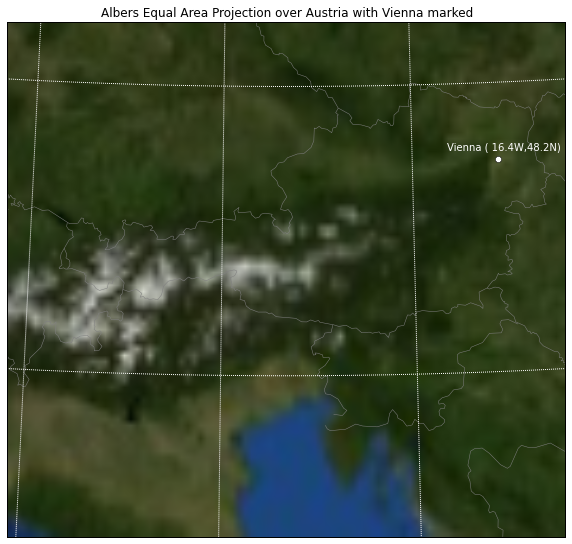

In [15]:
fig = plt.figure(figsize=(10, 10))
# setup albers equal area conic basemap
# lat_1 is first standard parallel.
# lat_2 is second standard parallel.
# lon_0,lat_0 is central point.
# Austria
m = Basemap(width=650000,height=600000,
            resolution='i',projection='aea',\
            lat_1=36.,lat_2=53,lon_0=13,lat_0=47)

m.bluemarble()
m.drawcountries(color="0.5")
# draw parallels and meridians.
m.drawparallels(np.arange(-80.,81.,3.), color="w")
m.drawmeridians(np.arange(-180.,181.,3.), color="w")

lon, lat = 16.3667, 48.2 # Location of Vienna
# convert to map projection coords.
# Note that lon,lat can be scalars, lists or numpy arrays.
xpt,ypt = m(lon,lat)
# convert back to lat/lon
lonpt, latpt = m(xpt,ypt,inverse=True)
m.plot(xpt,ypt,'wo')  # plot a white dot there
# put some text next to the dot, offset a little bit
# (the offset is in map projection coordinates)
plt.text(xpt-60000,ypt+10000,'Vienna (%5.1fW,%3.1fN)' % (lonpt,latpt), color="w")

plt.title("Albers Equal Area Projection over Austria with Vienna marked")
plt.show()

## How to plot data

- Lets look at the examples from the [Basemap help](http://matplotlib.org/basemap/users/examples.html)

### Different data forms need different plotting strategies

- imshow can only be used if data is already in 2D array on same projection
  - if not we have to transform the data
- three 1D arrays of lon, lat and data-values can be plotted using several methods
  - scatter: just plots points
  - pcolor: draws a pseudocolor plot (can become slow if there are a lot of points)
  - pcolormesh: faster for regular meshes

[u'time', u'dnflag', u'flag', u'freqband', u'lat', u'lon', u'mode', u'sensor', u'sm', u'sm_uncertainty', u't0']
(1, 720, 1440)


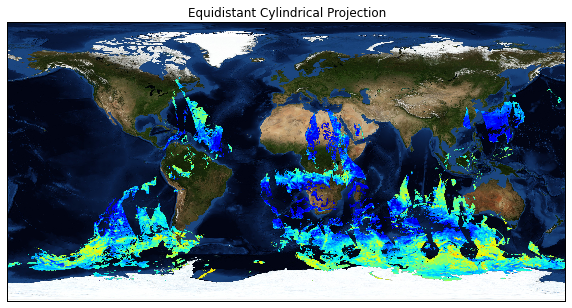

In [16]:
# load some ESA CCI soil moisture data
from netCDF4 import Dataset

with Dataset("ESACCI-SOILMOISTURE-L3S-SSMV-COMBINED-20130731000000-fv02.1.nc") as ds:
    print(list(ds.variables.keys()))
    sm = ds.variables['sm'][:]
    print(sm.shape)
    sm = sm.squeeze()
    fig = plt.figure(figsize=(10, 6))
    # llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
    # are the lat/lon values of the lower left and upper right corners
    # of the map.
    # resolution = 'c' means use crude resolution coastlines.
    m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
                llcrnrlon=-180,urcrnrlon=180,resolution='c')
    m.bluemarble()
    m.imshow(sm)
    plt.title("Equidistant Cylindrical Projection")
    plt.show()    

We have to flip the array/image for it to show correctly

What about other projections and imshow?

[u'time', u'dnflag', u'flag', u'freqband', u'lat', u'lon', u'mode', u'sensor', u'sm', u'sm_uncertainty', u't0']
(1, 720, 1440)


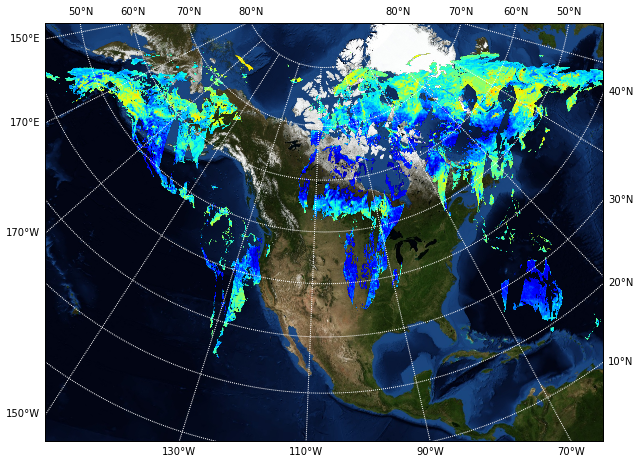

In [17]:
# load some ESA CCI soil moisture data
with Dataset("ESACCI-SOILMOISTURE-L3S-SSMV-COMBINED-20130731000000-fv02.1.nc") as ds:
    print(list(ds.variables.keys()))
    sm = ds.variables['sm'][:,::-1,:]
    print(sm.shape)
    sm = sm.squeeze()
    fig = plt.figure(figsize=(10, 10))
    m = Basemap(width=12000000,height=9000000,projection='lcc',
                resolution=None,lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
    m.bluemarble()
    # draw parallels and meridians.
    # label parallels on right and top
    # meridians on bottom and left
    parallels = np.arange(0.,81,10.)
    # labels = [left,right,top,bottom]
    m.drawparallels(parallels, color='w',labels=[False,True,True,False])
    meridians = np.arange(10.,351.,20.)
    m.drawmeridians(meridians, color='w', labels=[True,False,False,True])
    m.imshow(sm)
    plt.show()

This is obviously wrong. We have to project the data before we can use imshow

[u'time', u'dnflag', u'flag', u'freqband', u'lat', u'lon', u'mode', u'sensor', u'sm', u'sm_uncertainty', u't0']


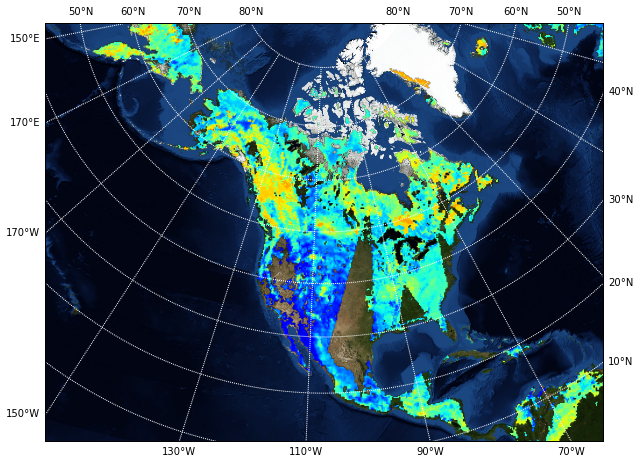

In [18]:
# load some ESA CCI soil moisture data
with Dataset("ESACCI-SOILMOISTURE-L3S-SSMV-COMBINED-20130731000000-fv02.1.nc") as ds:
    print(list(ds.variables.keys()))
    sm = ds.variables['sm'][:,::-1,:]
    lons = ds.variables['lon'][:]
    lats = ds.variables['lat'][::-1]
    sm = sm.squeeze()
    fig = plt.figure(figsize=(10, 10))
    m = Basemap(width=12000000,height=9000000,projection='lcc',
                resolution=None,lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
    m.bluemarble()
    # draw parallels and meridians.
    # label parallels on right and top
    # meridians on bottom and left
    parallels = np.arange(0.,81,10.)
    # labels = [left,right,top,bottom]
    m.drawparallels(parallels, color='w',labels=[False,True,True,False])
    meridians = np.arange(10.,351.,20.)
    m.drawmeridians(meridians, color='w', labels=[True,False,False,True])
    # transform to nx x ny regularly spaced 25km native projection grid
    nx = int((m.xmax-m.xmin)/25000.)+1
    ny = int((m.ymax-m.ymin)/25000.)+1
    sm_trans = m.transform_scalar(sm,lons,lats,nx,ny, order=0)
    m.imshow(sm_trans)
    plt.show()   

This looks better. We can also use pcolormesh for similar effect.

[u'time', u'dnflag', u'flag', u'freqband', u'lat', u'lon', u'mode', u'sensor', u'sm', u'sm_uncertainty', u't0']


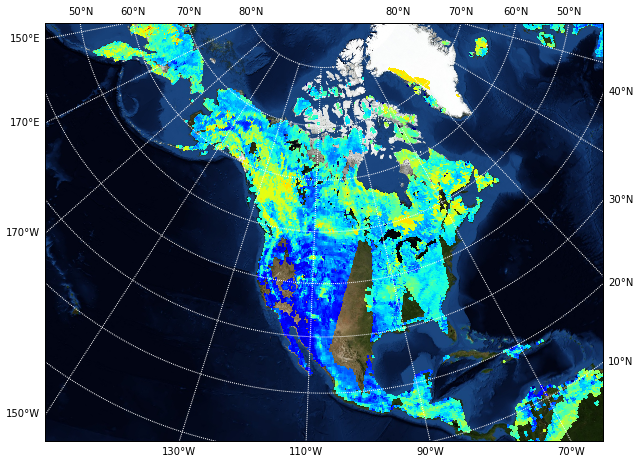

In [19]:
# load some ESA CCI soil moisture data
with Dataset("ESACCI-SOILMOISTURE-L3S-SSMV-COMBINED-20130731000000-fv02.1.nc") as ds:
    print(list(ds.variables.keys()))
    sm = ds.variables['sm'][:,::-1,:]
    lons = ds.variables['lon'][:]
    lats = ds.variables['lat'][::-1]
    # we need 2D lon, lat grids to use pcolormesh
    longrid, latgrid = np.meshgrid(lons, lats)
    sm = sm.squeeze()
    fig = plt.figure(figsize=(10, 10))
    m = Basemap(width=12000000,height=9000000,projection='lcc',
                resolution=None,lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
    m.bluemarble()
    # draw parallels and meridians.
    # label parallels on right and top
    # meridians on bottom and left
    parallels = np.arange(0.,81,10.)
    # labels = [left,right,top,bottom]
    m.drawparallels(parallels, color='w',labels=[False,True,True,False])
    meridians = np.arange(10.,351.,20.)
    m.drawmeridians(meridians, color='w', labels=[True,False,False,True])
    m.pcolormesh(longrid, latgrid, sm, latlon=True)
    plt.show() 

Now let us experiment with colorbars a little bit

[u'time', u'dnflag', u'flag', u'freqband', u'lat', u'lon', u'mode', u'sensor', u'sm', u'sm_uncertainty', u't0']


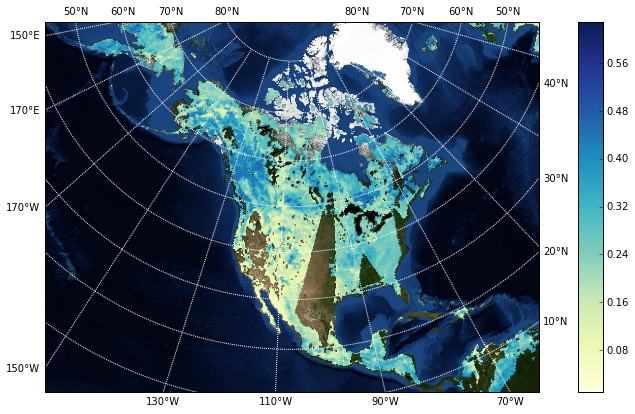

In [20]:
# load some ESA CCI soil moisture data
with Dataset("ESACCI-SOILMOISTURE-L3S-SSMV-COMBINED-20130731000000-fv02.1.nc") as ds:
    print(list(ds.variables.keys()))
    sm = ds.variables['sm'][:,::-1,:]
    lons = ds.variables['lon'][:]
    lats = ds.variables['lat'][::-1]
    sm = sm.squeeze()
    fig = plt.figure(figsize=(10, 10))
    m = Basemap(width=12000000,height=9000000,projection='lcc',
                resolution=None,lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
    m.bluemarble()
    # draw parallels and meridians.
    # label parallels on right and top
    # meridians on bottom and left
    parallels = np.arange(0.,81,10.)
    # labels = [left,right,top,bottom]
    m.drawparallels(parallels, color='w',labels=[False,True,True,False])
    meridians = np.arange(10.,351.,20.)
    m.drawmeridians(meridians, color='w', labels=[True,False,False,True])
    # transform to nx x ny regularly spaced 25km native projection grid
    nx = int((m.xmax-m.xmin)/25000.)+1
    ny = int((m.ymax-m.ymin)/25000.)+1
    sm_trans = m.transform_scalar(sm,lons,lats,nx,ny, order=0)
    im = m.imshow(sm_trans, 'YlGnBu')
    cb = m.colorbar(im,"right", size="5%", pad='8%')
    plt.show()   

## Plot soil moisture and soil moisture noise over a different region using a different projection using 2 axes.

Tip: Basemap takes an ax argument which tells it on which axes to plot.

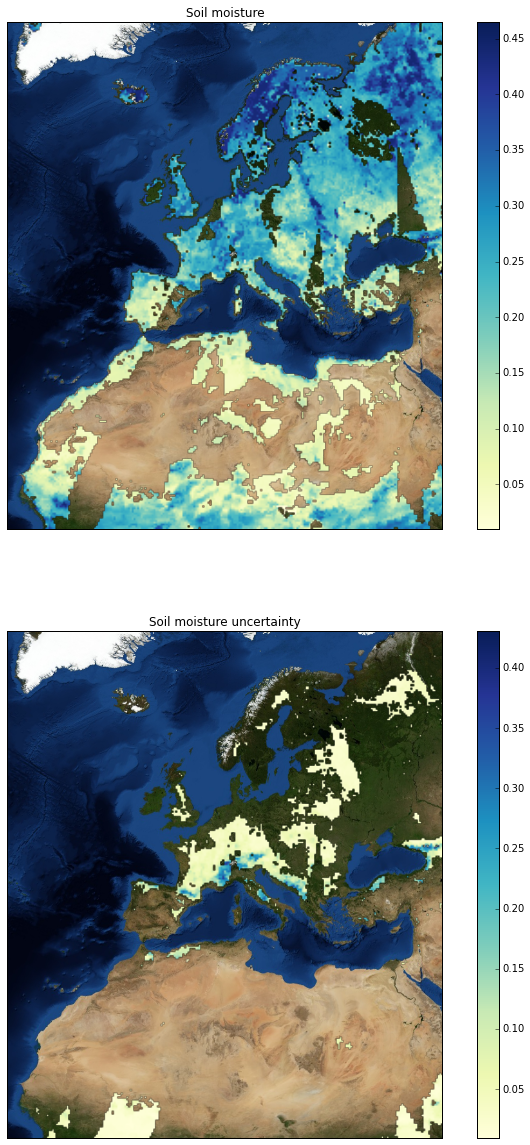

In [29]:
fig = plt.figure(figsize=(10, 20))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)

# Europe
m1 = Basemap(width=6000000,height=7000000,
            resolution='l',projection='aea',\
            lat_1=36.,lat_2=53,lon_0=7,lat_0=44, ax=ax1)
ax1.set_title('Soil moisture')
m1.bluemarble()
m2 = Basemap(width=6000000,height=7000000,
            resolution='l',projection='aea',\
            lat_1=36.,lat_2=53,lon_0=7,lat_0=44, ax=ax2)
ax2.set_title('Soil moisture uncertainty')
m2.bluemarble()

with Dataset("ESACCI-SOILMOISTURE-L3S-SSMV-COMBINED-20130731000000-fv02.1.nc") as ds:
    sm = ds.variables['sm'][:,::-1,:].squeeze()
    sm_noise = ds.variables['sm_uncertainty'][:,::-1,:].squeeze()
    lons = ds.variables['lon'][:]
    lats = ds.variables['lat'][::-1]
    # transform to nx x ny regularly spaced 25km native projection grid
    n1x = int((m1.xmax-m1.xmin)/25000.)+1
    n1y = int((m1.ymax-m1.ymin)/25000.)+1
    n2x = int((m2.xmax-m2.xmin)/25000.)+1
    n2y = int((m2.ymax-m2.ymin)/25000.)+1
    sm_trans = m1.transform_scalar(sm,lons,lats,n1x,n1y, order=0)
    sm_noise_trans = m2.transform_scalar(sm_noise,lons,lats,n2x,n2y, order=0)
    im1 = m1.imshow(sm_trans, 'YlGnBu')
    im2 = m2.imshow(sm_noise_trans, 'YlGnBu')
    # add colorbars
    m1.colorbar(im1,"right", size="5%", pad='8%')
    m2.colorbar(im2,"right", size="5%", pad='8%')

plt.show()

# Other packages

## Mapping related

-   [Shapely](http://toblerity.org/shapely/project.html): Manipulation and analysis of geometric objects in the Cartesian plane.
-   [Fiona](http://toblerity.org/fiona/): Interface to OGR for vector data manipulation.
-   [geopandas](https://github.com/geopandas/geopandas): Tries to bring pandas like operations to geodata - very young project.
-   [descartes](https://pypi.python.org/pypi/descartes): Connection of shapely or GeoJSON to matplotlib.

## General plotting

-   3D 
    -   <https://github.com/enthought/mayavi>
